# Graph Diameter

In [11]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt

In [1]:
G=nx.read_edgelist('0.edges') # from https://snap.stanford.edu/data/egonets-Facebook.html

NameError: name 'nx' is not defined

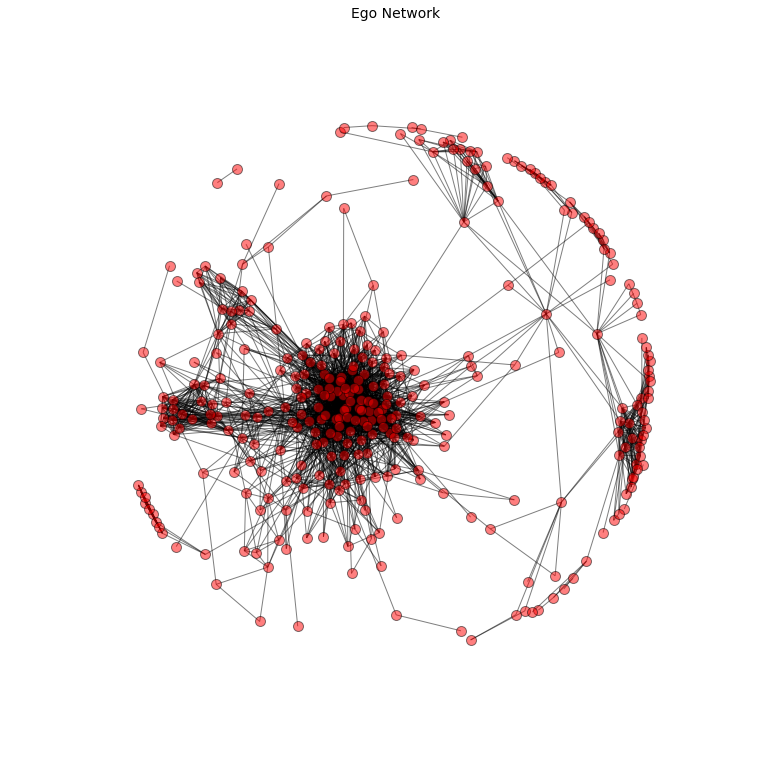

In [31]:
plt.figure(figsize=(10,10))
nx.draw_spring(G,node_size=100,alpha=.5)
plt.title('Ego Network',fontsize=14)
plt.show()